## Alternative assignment

Here you can find an alternative assignment notebook which does not require py2 or a physical screen.

For starters, please go to __qlearning.py__ file in the current folder and implement q-learning agent by following instructions in the file.

In [1]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

bash: ../xvfb: No such file or directory
env: DISPLAY=:1


### Demo on taxi

Here we use the qlearning agent from before on taxi env from openai gym.
You will need to insert a few agent functions here.

In [2]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

[2017-12-25 20:57:55,969] Making new env: Taxi-v2


In [3]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [4]:
def play_and_train(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        
        a =  agent.getAction(s)#<get agent to pick action given state s>
        
        next_s,r,done,_ = env.step(a)
        agent.update(s,a,next_s,r)
        
        #<train(update) agent for state s>
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward
    
        
    

0.04059802359226594


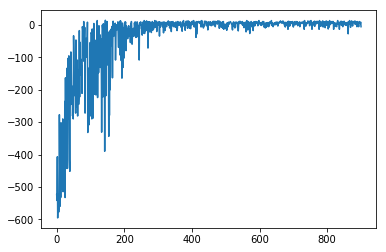

In [5]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))
    
    agent.epsilon *= 0.999
    
    if i %100 ==0:
        clear_output(True)
        print (agent.epsilon)
        plt.plot(rewards)
        plt.show()
        

In [6]:
from evsarsa import EvSarsaAgent

In [7]:
new_agent =  EvSarsaAgent(alpha=0.8,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

0.014927707529619883


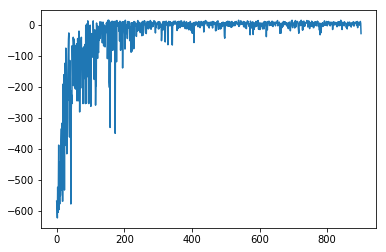

In [8]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,new_agent))
    
    agent.epsilon *= 0.999
    
    if i %100 ==0:
        clear_output(True)
        print (agent.epsilon)
        plt.plot(rewards)
        plt.show()
        

# Main assignment

Use agent to train efficiently on CartPole-v0

This environment has a continuous number of states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

In [4]:
#run xvfb and set %env DISPLAY=:1 if in binder or on a server
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s"%(env.reset()))
#plt.imshow(env.render('rgb_array'))

[2017-12-25 20:58:15,075] Making new env: CartPole-v0


first state:[ 0.00357922 -0.04654649 -0.04141185  0.02105914]


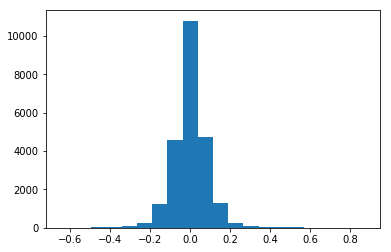

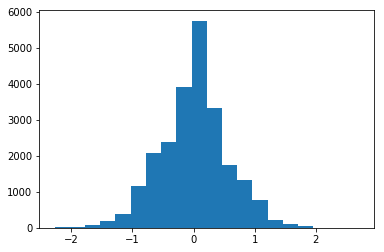

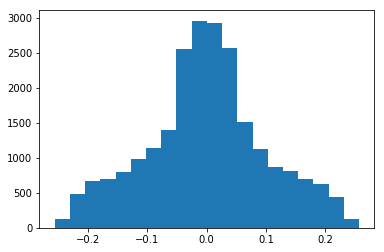

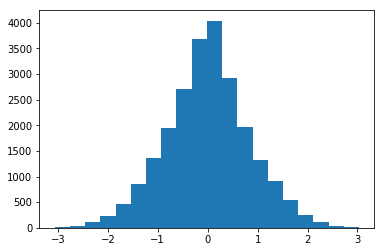

In [5]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s,r,done,_ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    
    plt.hist(all_states[:,obs_i],bins=20)
    plt.show()

In [6]:
from gym.core import ObservationWrapper
class Binarizer(ObservationWrapper):
    
    def _observation(self,state):    
        
        #state = <round state to some amount digits.>
        #hint: you can do that with round(x,n_digits)
        #you will need to pick a different n_digits for each dimension
        
        #state = np.round(state,n_digits)#
        state = [round(s, n_digits[i]) for i,s in enumerate(state)]
        
        
        
        
        return tuple(state)

In [7]:
n_digits = [2,1,1,1]

In [8]:
env = Binarizer(gym.make("CartPole-v0"))

[2017-12-25 20:58:18,870] Making new env: CartPole-v0


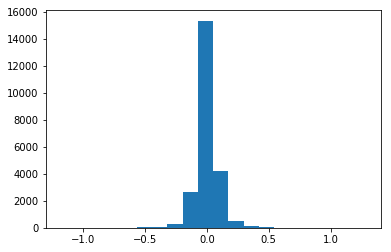

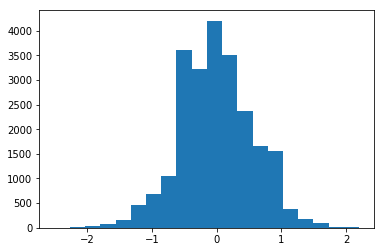

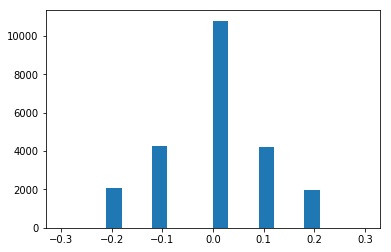

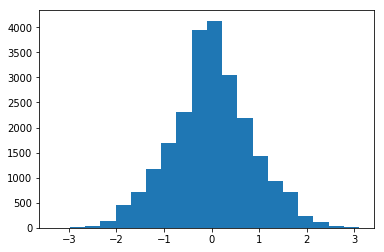

In [14]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s,r,done,_ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    
    plt.hist(all_states[:,obs_i],bins=20)
    plt.show()



In [15]:
agent = QLearningAgent(alpha=0.8,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

mean reward 28.9


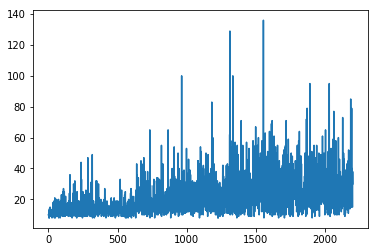

KeyboardInterrupt: 

In [16]:
rewards = []
for i in range(35000):
    rewards.append(play_and_train(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
        


In [14]:
from evsarsa import EvSarsaAgent

In [18]:
new_agent = EvSarsaAgent(alpha=0.5,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [19]:
rewards = []
for i in range(35000):
    rewards.append(play_and_train(env,new_agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()



mean reward 16.78


KeyboardInterrupt: 

In [16]:
import random
class ReplayBuffer(object):
    def __init__(self, size):
        """Create Replay buffer.
        Parameters
        ----------
        size: int
            Max number of transitions to store in the buffer. When the buffer
            overflows the old memories are dropped.
        """
        self._storage = []
        self._maxsize = size
        #<any other vars>
        

    def __len__(self):
        return len(self._storage)

    def add(self, obs_t, action, reward, obs_tp1, done):
        '''
        Make sure, _storage will not exceed _maxsize. 
        Make sure, FIFO rule is being followed: the oldest examples has to be removed earlier
        '''
        
        data = (obs_t, action, reward, obs_tp1, done)
        #print(data)
        if self.__len__() == self._maxsize:
            self._storage = self._storage[1:]
        self._storage += [data]
        #print('data last', self._storage[-1])
        #<add data to storage.>
        
    def sample(self, batch_size):
        """Sample a batch of experiences.
        Parameters
        ----------
        batch_size: int
            How many transitions to sample.
        Returns
        -------
        obs_batch: np.array
            batch of observations
        act_batch: np.array
            batch of actions executed given obs_batch
        rew_batch: np.array
            rewards received as results of executing act_batch
        next_obs_batch: np.array
            next set of observations seen after executing act_batch
        done_mask: np.array
            done_mask[i] = 1 if executing act_batch[i] resulted in
            the end of an episode and 0 otherwise.
        """
        idxes = np.random.randint(0, self.__len__(),size = batch_size)#<randomly generate indexes of samples>
        
        states, actions, rewards, new_states, is_done = [], [], [] , [], []
        
        ###Your code: collect <s,a,r,s',done> for each index
        for i in idxes:
            s, a, r, new_s, info = self._storage[i]
            states += [s] 
            actions += [a] 
          
            rewards += [r] 
            new_states += [new_s] 
            is_done += [info]
        
        return states, np.array(actions), np.array(rewards), new_states, np.array(is_done)


In [17]:
#тут появилась не очевидная вещь :
np.array([(1,2), (2,3)]) 
#а туплы нужны, чтобы жить в дискретносм пространстве ошибка в Q[state][action]

array([[1, 2],
       [2, 3]])

In [18]:
replay = ReplayBuffer(2)
obj1 = tuple(range(5))
obj2 = tuple(range(5, 10))
replay.add(*obj1)
# assert replay.sample(1)==obj1, "If there's just one object in buffer, it must be retrieved by buf.sample(1)"
replay.add(*obj2)
assert len(replay._storage)==2, "Please make sure __len__ methods works as intended."
replay.add(*obj2)
assert len(replay._storage)==2, "When buffer is at max capacity, replace objects instead of adding new ones."
assert tuple(np.unique(a) for a in replay.sample(100))==obj2
replay.add(*obj1)
assert max(len(np.unique(a)) for a in replay.sample(100))==2
replay.add(*obj1)
assert tuple(np.unique(a) for a in replay.sample(100))==obj1
print ("Success!")

Success!


In [19]:
def play_and_trainER(env,agent,replay,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    #<How you need to modify pipeline in order to use ER?>
    for t in range(t_max):
        

        a = agent.getAction(s)#<get agent to pick action given state s>
        next_s, r, done,_ = env.step(a)
        
        replay.add(s, a, r, next_s, done)
        
        
        states, actions, rewards, new_states, is_done = replay.sample(min(5, replay.__len__()))
        for i in range(len(states)):
            #print(states[i],actions[i],new_states[i],rewards[i])
            agent.update(states[i],actions[i],new_states[i],rewards[i])
    
        ###Your code here: store current <s,a,r,s'> transition in buffer
        ###Your code here: train on both current 
        
        s = next_s
        total_reward +=r
        if done:break
    
    return total_reward

In [20]:
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s"%(env.reset()))

[2017-12-25 20:58:59,238] Making new env: CartPole-v0


first state:[-0.01831118 -0.02702519  0.04916501 -0.04358971]


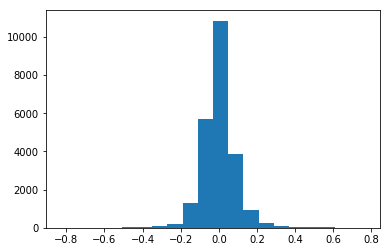

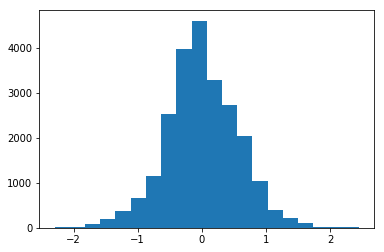

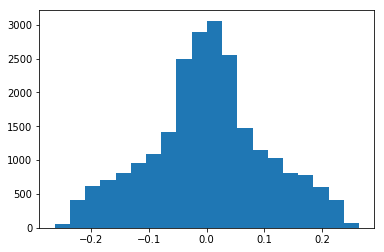

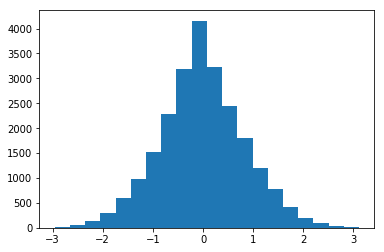

In [21]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s,r,done,_ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    
    plt.hist(all_states[:,obs_i],bins=20)
    plt.show()



In [22]:
env = Binarizer(gym.make('CartPole-v0'))

[2017-12-25 20:59:00,699] Making new env: CartPole-v0


In [23]:
agent = EvSarsaAgent(alpha=0.5,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))
replay = ReplayBuffer(10000)

mean reward 57.63


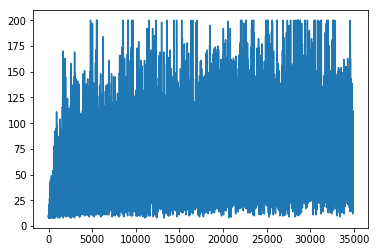

In [24]:
rewards = []
for i in range(35000):
    rewards.append(play_and_trainER(env,agent, replay))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()

